In [156]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Collection

This dataset was downloaded from Kaggle. <br>
(Link to Kaggle dataset):
https://www.kaggle.com/code/marto24/bankruptcy-detection

In [157]:
data = pd.read_csv('data.csv')
data = data.dropna()

## Exploratory Data Analysis

<i>Looking at the class frequencies to look at the distribution of the data</i>

Text(0.5, 1.0, 'Class balance')

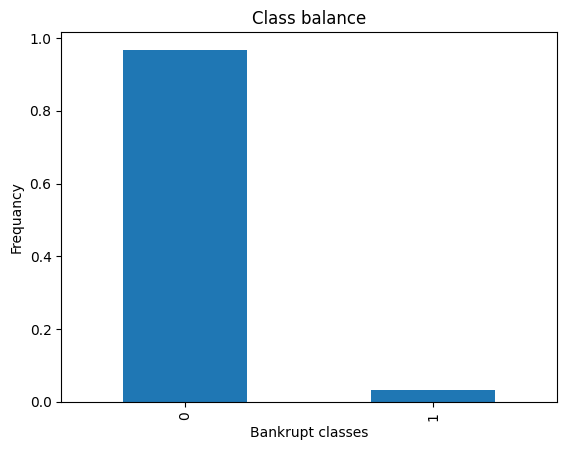

In [158]:
data['Bankrupt?'].value_counts(normalize= True).plot(kind= 'bar')
plt.xlabel("Bankrupt classes")
plt.ylabel("Frequancy")
plt.title("Class balance")

<i>The data seems to be very imbalanced. Checking the specific distributive percentages of the classes.</i>

In [159]:
print(data['Bankrupt?'].value_counts(normalize= True))

Bankrupt?
0    0.967737
1    0.032263
Name: proportion, dtype: float64


#### Correlation Matrix

In [160]:

plt.figure(figsize=(200, 160))  # Set the figure size in inches (width, height)
corr = data.corr()
sns.heatmap(corr, annot = True, vmin=-1, vmax=1, cmap = 'RdBu', linewidths=0.5)

<Axes: >

<i>The high number of variables make the correlation matrix hard to analyze, but it is quite clear that there are some variables that contribute more significantly to bankruptcy and are scarcely distributed. Most of the dataset consists of variables that have relatively trivial contributions to Bankruptcy. </i> <br>
<i>To look at the variables that have non-trivial contributions, we set a threshold of $0.2$. </i>

In [161]:
vars = []

for i in range(len(corr["Bankrupt?"])):
    if abs(corr["Bankrupt?"][i]) > 0.15:
        vars.append(corr["Bankrupt?"].index[i])

print(vars)

['Bankrupt?', ' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Per Share Net profit before tax (Yuan ¥)', ' Debt ratio %', ' Net worth/Assets', ' Borrowing dependency', ' Net profit before tax/Paid-in capital', ' Working Capital to Total Assets', ' Current Liability to Assets', ' Current Liabilities/Equity', ' Retained Earnings to Total Assets', ' Current Liability to Equity', ' Current Liability to Current Assets', ' Net Income to Total Assets', " Net Income to Stockholder's Equity", ' Liability to Equity']


/var/folders/f9/jdxhns6s5xqbjc5h71x7s2740000gn/T/ipykernel_3638/1875777422.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(corr["Bankrupt?"][i]) > 0.15:


Looking at the correlation matrix, we have stored the variables that have a non-trivial correlation $( > 0.2)$ to bankruptcy in the variable ```var```.
 

<i>Lets look at the distributions of the filtered variables. </i>

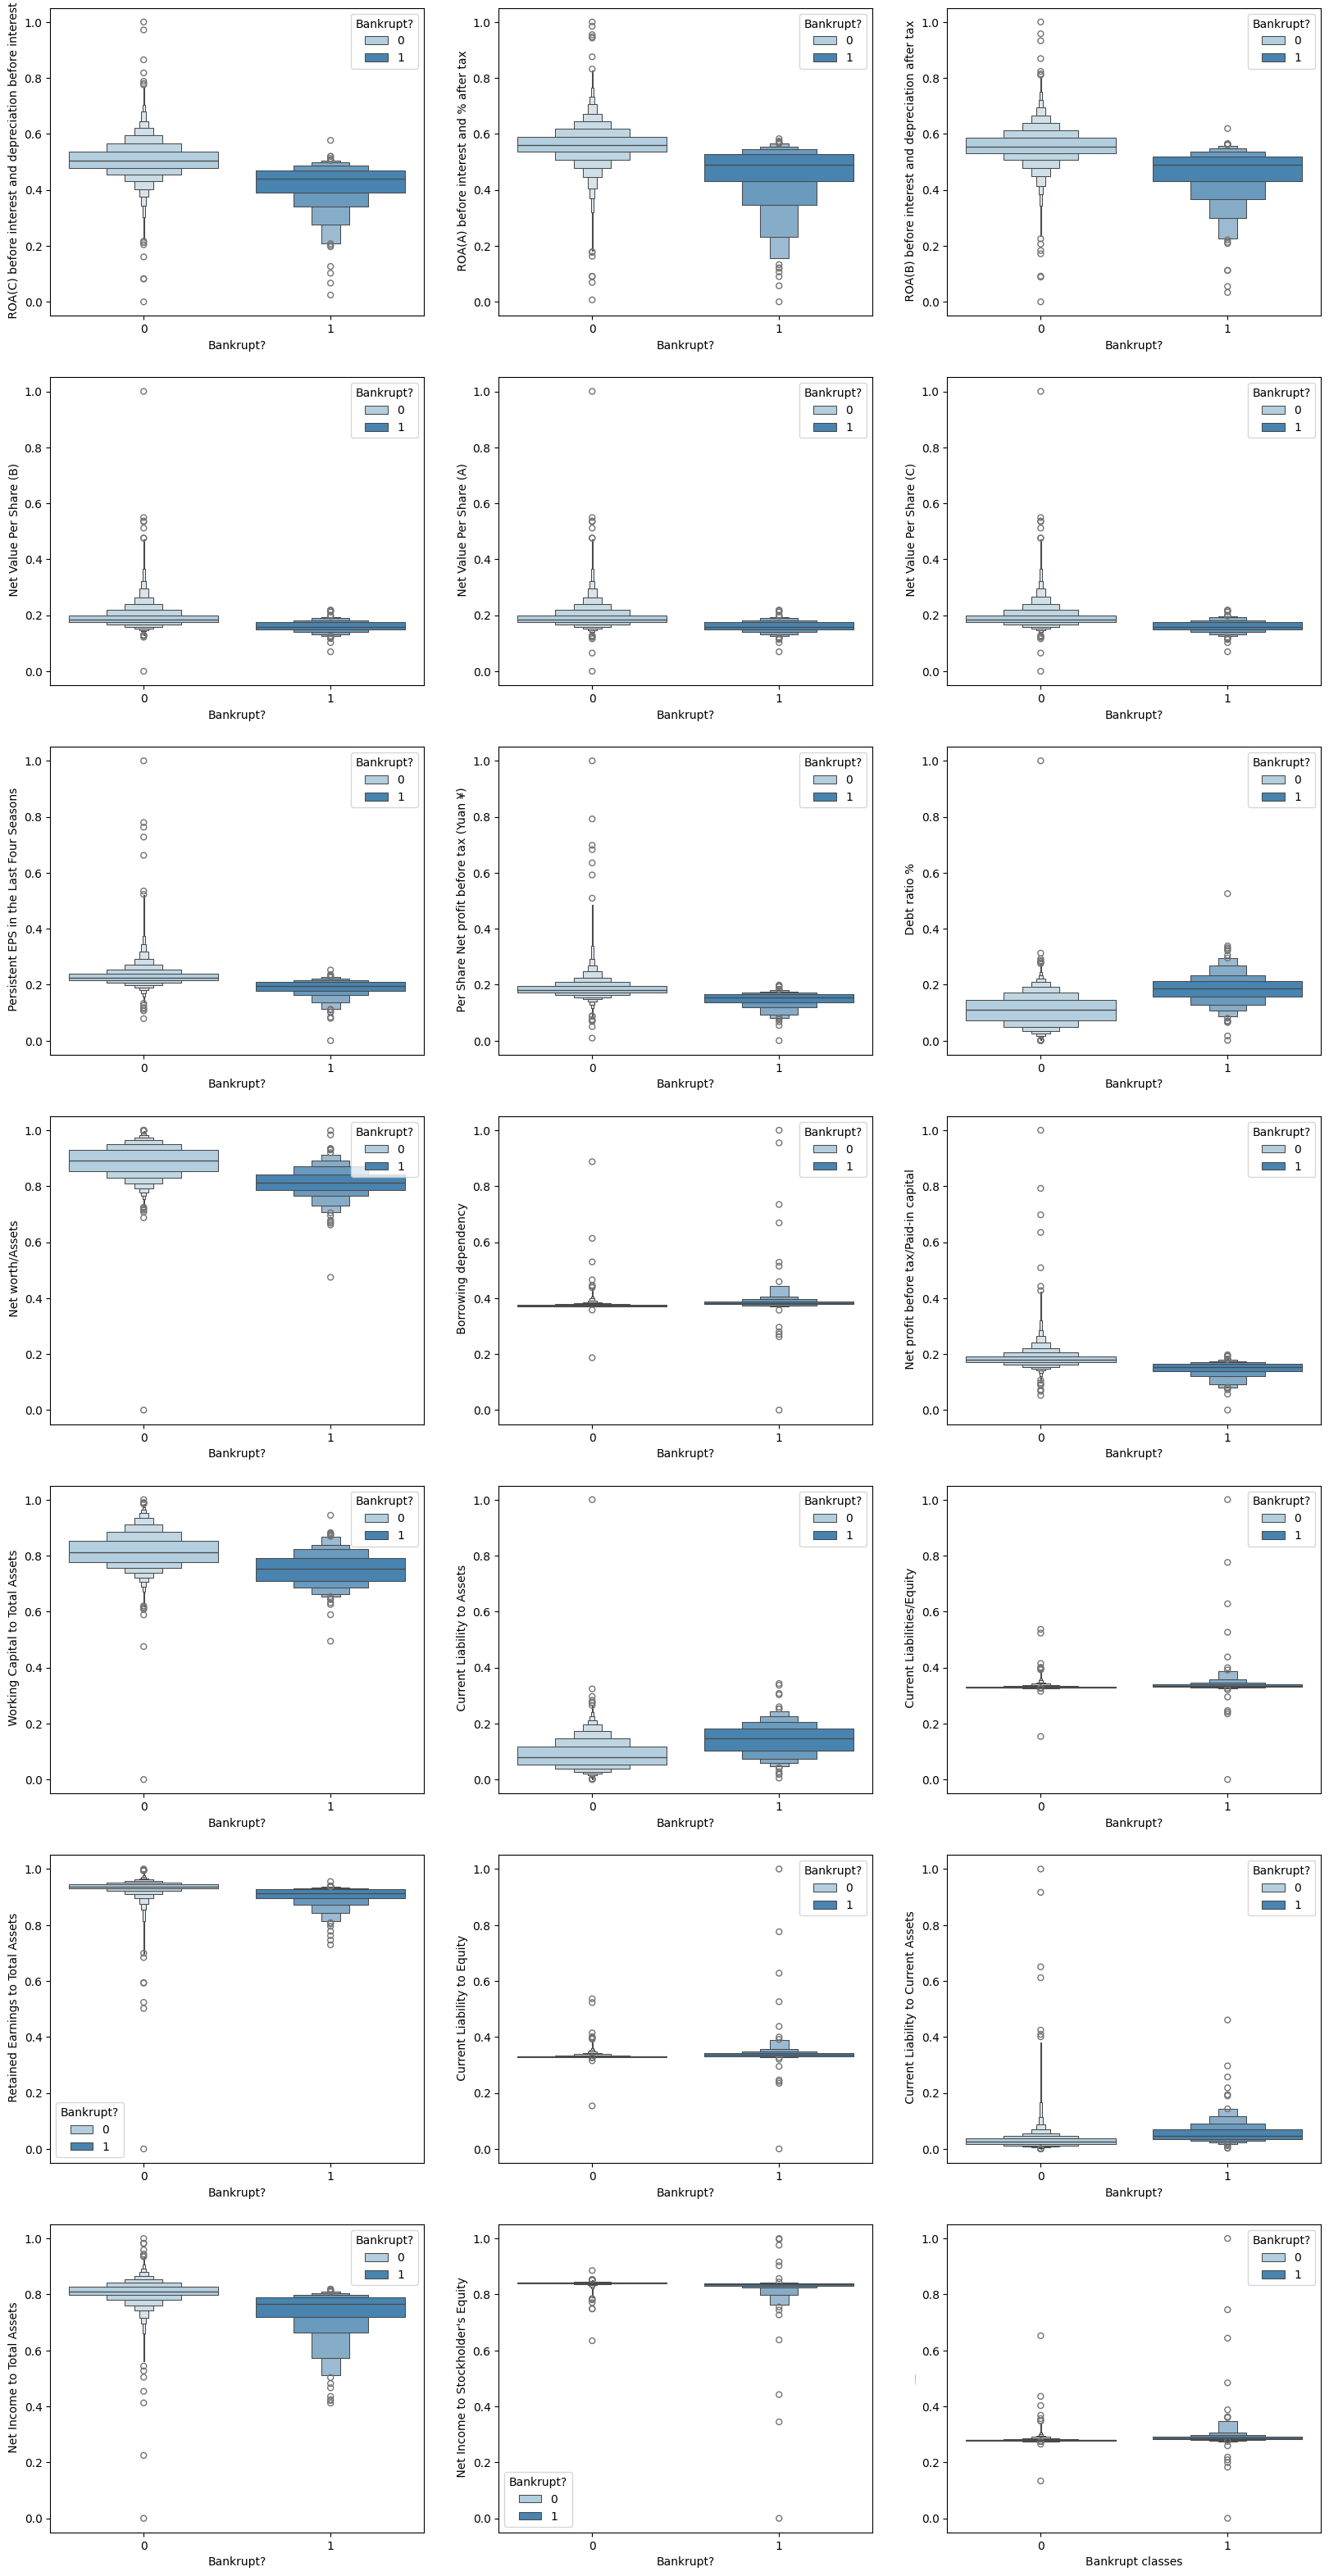

In [162]:
fig, axes = plt.subplots(len(vars) // 3, 3, figsize=(20, 40))
i, j = 0, 0
for var in vars:
    if var == "Bankrupt?":
        continue
    sns.boxenplot(ax = axes[i, j], x="Bankrupt?", y=var, data=data, palette="Blues", hue = "Bankrupt?")
    plt.xlabel("Bankrupt classes")
    plt.ylabel(var, fontsize= 1)
    j += 1
    if j == 3:
        j = 0
        i += 1

<i>While the plots could be informative, the significant presence of outliers makes anaysis quite hard. This warrants filtering the outliers and scaling the data to ensure a more comprehensive and representative plot.</i>

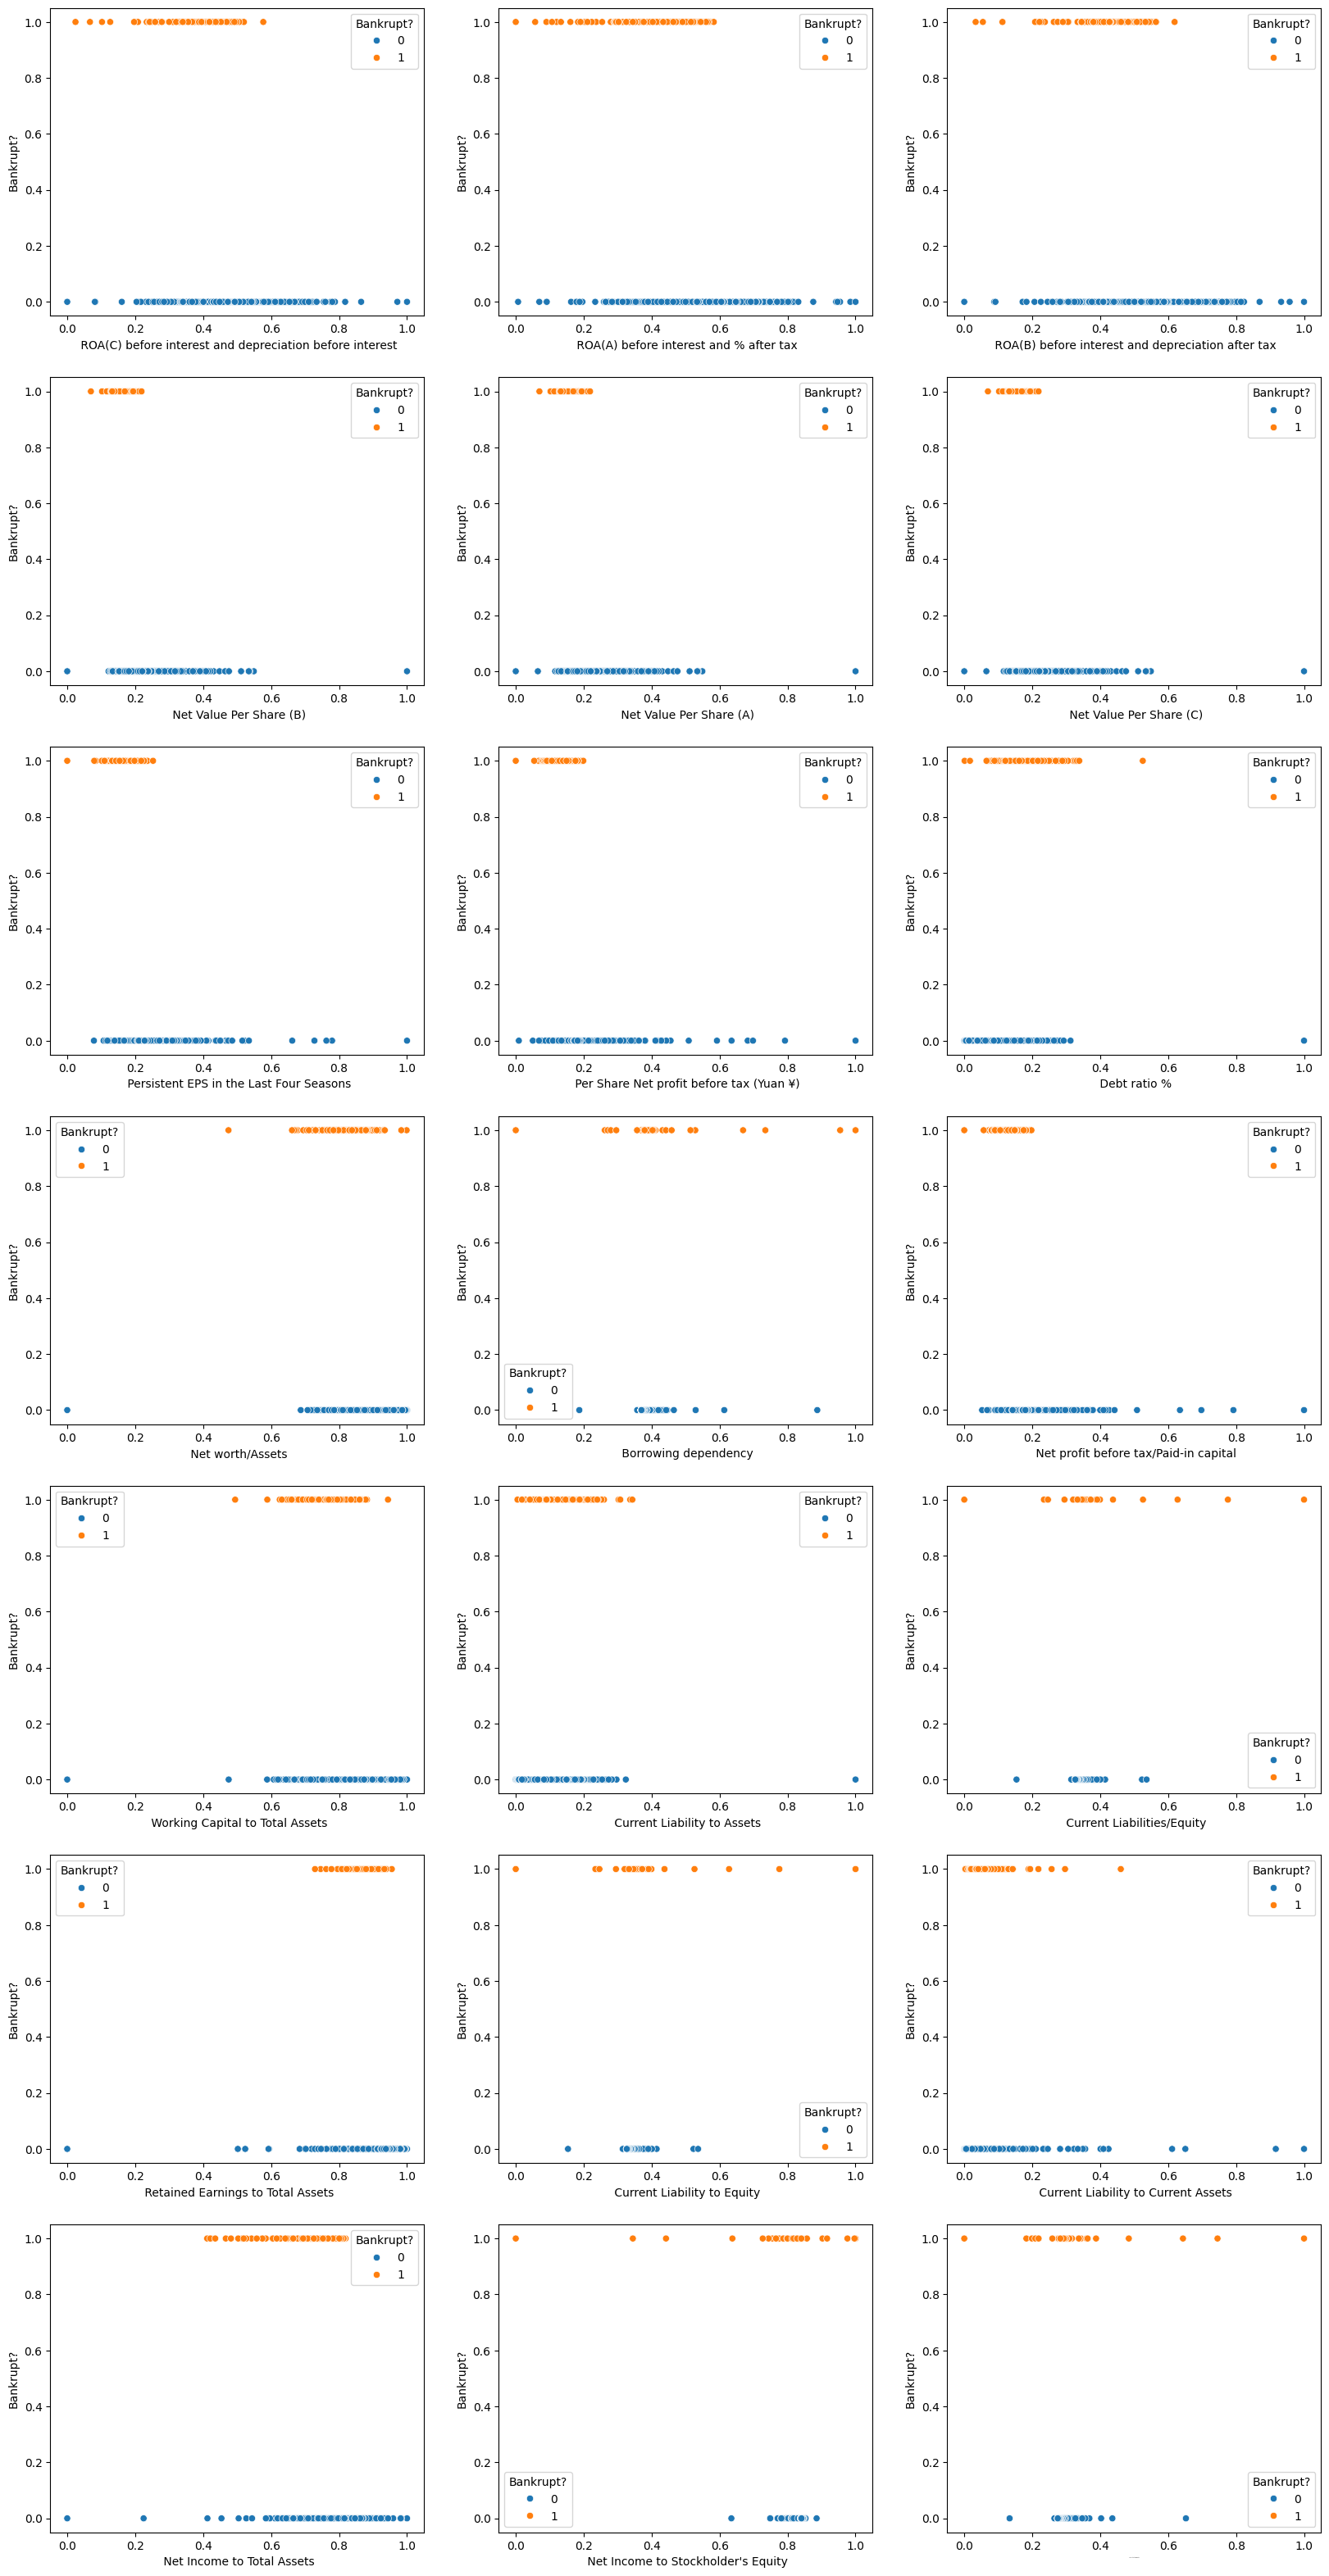

In [163]:
fig, axes = plt.subplots(len(vars) // 3, 3, figsize=(20, 40))
i, j = 0, 0
for var in vars:
    if var == "Bankrupt?":
        continue
    sns.scatterplot(ax = axes[i, j], x=var, y='Bankrupt?', data=data, hue='Bankrupt?')
    plt.xlabel(var, fontsize=1)
    plt.ylabel('Bankrupt?')
    j += 1
    if j == 3:
        j = 0
        i += 1


## Data Cleaning and Preprocessing

Filtering the data by the variables that have a non-trivial correlation to Bankruptcy

In [164]:
data = data[vars]
display(data.head())

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.147950                  0.147950   
1                  0.182251                  0.182251   
2                  0.177911                  0.177911   
3                  0.154187                  0.154187   
4                  0.167502                  0.167502   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.147950                                  0.169141   
1                  0.182251                                  0.208944   
2                  0.193713                                  0.180581   
3                  0.154187                                  0.193722   
4                  0.167502                                  0.212537   

    Per Share Net profit before tax (Yuan ¥)   Debt ratio %  ...  \
0                                   0.138736       0.207576  ...   
1                                   0.169918       0.171176  ...   
2                                   0.142803       0.207516  ...   
3                                   0.148603       0.151465  ...   
4                                   0.168412       0.106509  ...   

    Net profit before tax/Paid-in capital   Working Capital to Total Assets  \
0                                0.137757                          0.672775   
1                                0.168962                          0.751111   
2                                0.148036                          0.829502   
3                                0.147561                          0.725754   
4                                0.167461                          0.751822   

    Current Liability to Assets   Current Liabilities/Equity  \
0                      0.147308                     0.339077   
1                      0.056963                     0.329740   
2                      0.098162                     0.334777   
3                      0.098715                     0.331509   
4                      0.110195                     0.330726   

    Retained Earnings to Total Assets   Current Liability to Equity  \
0                            0.903225                      0.339077   
1                            0.931065                      0.329740   
2                            0.909903                      0.334777   
3                            0.906902                      0.331509   
4                            0.913850                      0.330726   

    Current Liability to Current Assets   Net Income to Total Assets  \
0                              0.118250                     0.716845   
1                              0.047775                     0.795297   
2                              0.025346                     0.774670   
3                              0.067250                     0.739555   
4                              0.047725                     0.795016   

    Net Income to Stockhold

Removing outliers using the IQR method <br>
Scaling the data using the Standard Scaler <br>

In [165]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Check for missing n if theree is fill with median
missing_values = data.isnull().sum()
data.fillna(data.median(), inplace=True)
data = data.drop_duplicates()


#removes outliers


for column in data.columns[1:]:  # Skip the first column as it's the target variable
        df = data
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        df[column] = df[column].clip(lower_limit, upper_limit)


#feature scaling

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop(columns=['Bankrupt?']))
scaled_df = pd.DataFrame(scaled_features, columns=data.columns[1:])


<i>We can now go back to our boxplots to look at the distributions of the variables that have a non-trivial correlation to bankruptcy. </i>

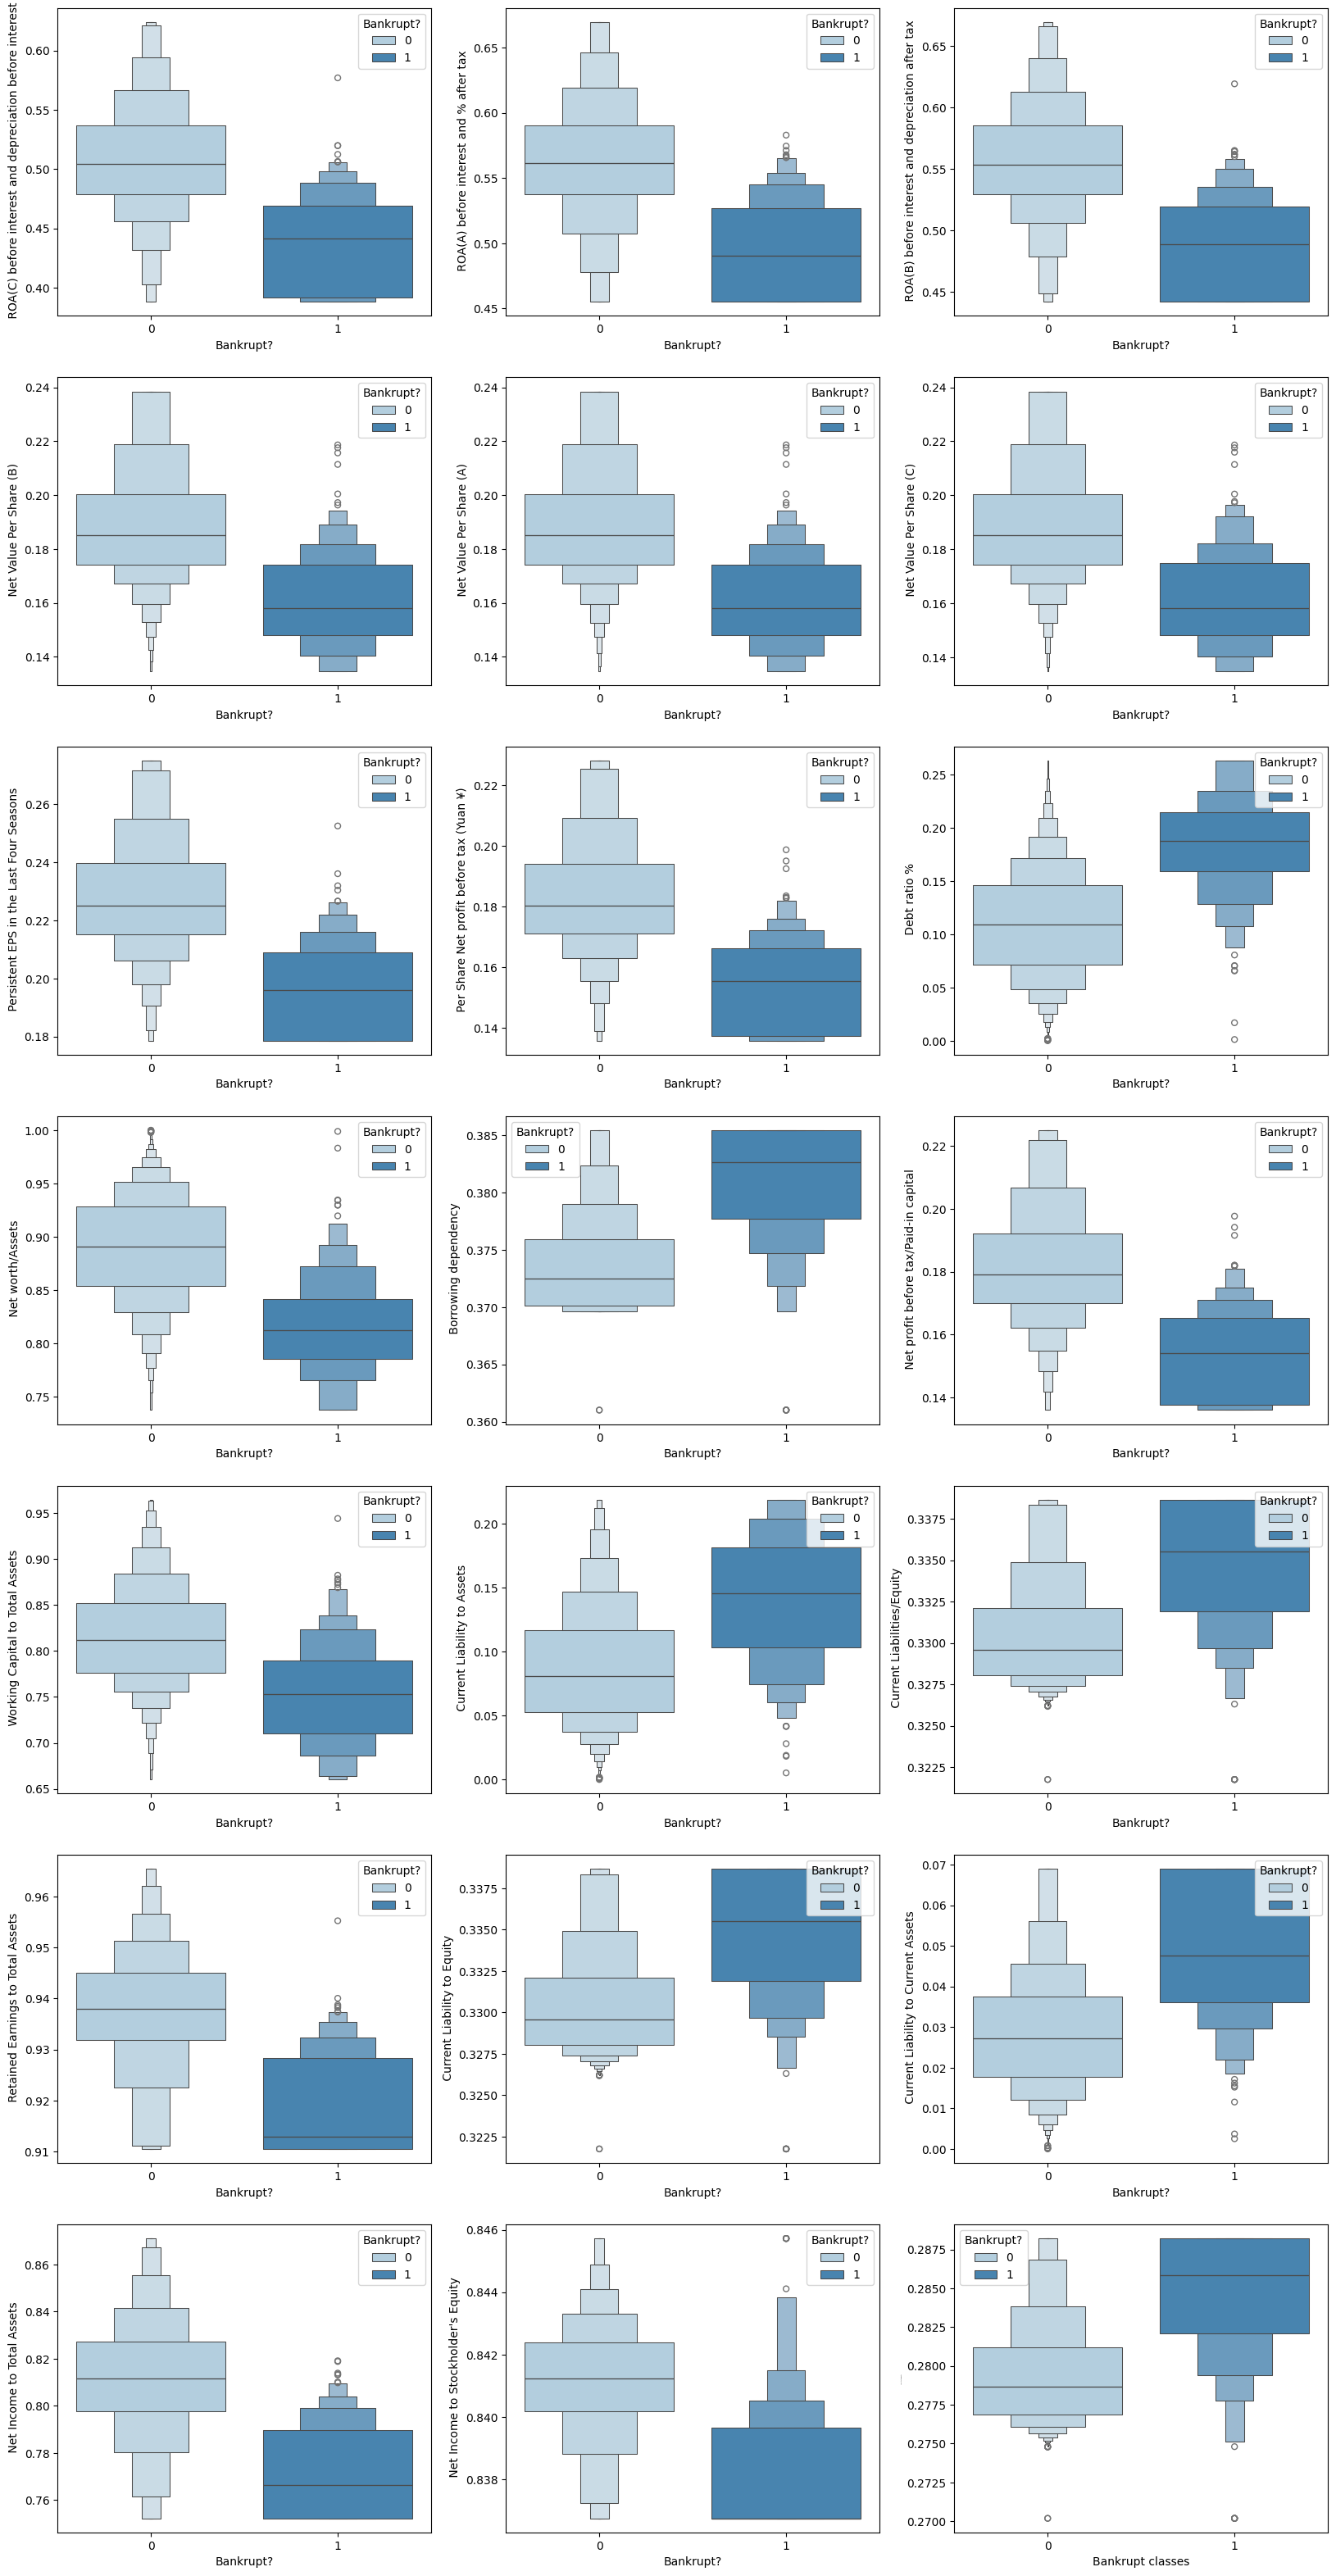

In [166]:
fig, axes = plt.subplots(len(vars) // 3, 3, figsize=(20, 40))
i, j = 0, 0
for var in vars:
    if var == "Bankrupt?":
        continue
    sns.boxenplot(ax = axes[i, j], x="Bankrupt?", y=var, data=data, palette="Blues", hue = "Bankrupt?")
    plt.xlabel("Bankrupt classes")
    plt.ylabel(var, fontsize= 1)
    j += 1
    if j == 3:
        j = 0
        i += 1

<i> Now with a more representative visualization of the data distribution, we can see that the distributions of the variables in the negative case of the Bankruptcy variable ```("Bankruptcy?" = 0)``` are normally distrbuted while that of the positive case ```("Bankruptcy?" = 1)``` are skewed. </i>

## Data Splitting and Model Selection

We can now split the data into testing and training sets

In [167]:
X = scaled_df
y = data['Bankrupt?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)


df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.387973          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.455122   
1                                 0.538214   
2                                 0.499019   
3                                 0.455122   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.442034    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.147950                  0.147950   
1                  0.182251                  0.182251   
2                  0.177911                  0.177911   
3                  0.154187                  0.154187   
4                  0.167502                  0.167502   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.147950                                  0.178548   
1                  0.182251                                  0.208944   
2                  0.193713                                  0.180581   
3                  0.154187                                  0.193722   
4                  0.167502                                  0.212537   

    Per Share Net profit before tax (Yuan ¥)   Debt ratio %  ...  \
0                                   0.138736       0.207576  ...   
1                                   0.169918       0.171176  ...   
2                                   0.142803       0.207516  ...   
3                                   0.148603       0.151465  ...   
4                                   0.168412       0.106509  ...   

    Net profit before tax/Paid-in capital   Working Capital to Total Assets  \
0                                0.137757                          0.672775   
1                                0.168962                          0.751111   
2                                0.148036                          0.829502   
3                                0.147561                          0.725754   
4                                0.167461                          0.751822   

    Current Liability to Assets   Current Liabilities/Equity  \
0                      0.147308                     0.338662   
1                      0.056963                     0.329740   
2                      0.098162                     0.334777   
3                      0.098715                     0.331509   
4                      0.110195                     0.330726   

    Retained Earnings to Total Assets   Current Liability to Equity  \
0                            0.910524                      0.338662   
1                            0.931065                      0.329740   
2                            0.910524                      0.334777   
3                            0.910524                      0.331509   
4                            0.913850                      0.330726   

    Current Liability to Current Assets   Net Income to Total Assets  \
0                              0.068886                     0.752193   
1                              0.047775                     0.795297   
2                              0.025346                     0.774670   
3                              0.067250                     0.752193   
4                              0.047725                     0.795016   

    Net Income to Stockhold

### Oversampling the minority class. <br>
Oversampling reduced the testing evaluation metrics. <br>

In [168]:
# from imblearn.over_sampling import ADASYN

# ada = ADASYN()
# X_train_res, y_train_res = ada.fit_resample(X_train, y_train)

#### Looking at various metrics to determine the best model for the data

<h5>ROC AUC <h5>

In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy'),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "Neural Network": MLPClassifier(learning_rate='adaptive', max_iter=1000),
    "XGBoost": XGBClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    results[name] = cv_scores.mean()

for model, score in results.items():
    print(f"{model}: Mean ROC AUC = {score:.4f}")


Logistic Regression: Mean ROC AUC = 0.9325
Decision Tree: Mean ROC AUC = 0.6231
Random Forest: Mean ROC AUC = 0.9010
Gradient Boosting: Mean ROC AUC = 0.9204
Support Vector Machine: Mean ROC AUC = 0.8028
Neural Network: Mean ROC AUC = 0.9198
XGBoost: Mean ROC AUC = 0.9113
AdaBoost: Mean ROC AUC = 0.9093


##### Plotting ROC Curves for the models

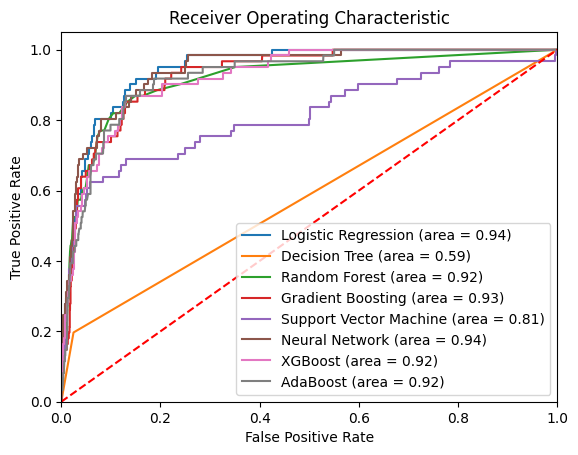

In [170]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#### Confusion Matrix

In [171]:
from sklearn.metrics import confusion_matrix

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name}:\n", confusion_matrix(y_test, y_pred))

Logistic Regression:
 [[1970   15]
 [  47   14]]
Decision Tree:
 [[1935   50]
 [  46   15]]
Random Forest:
 [[1973   12]
 [  55    6]]
Gradient Boosting:
 [[1964   21]
 [  52    9]]
Support Vector Machine:
 [[1984    1]
 [  58    3]]
Neural Network:
 [[1964   21]
 [  43   18]]
XGBoost:
 [[1971   14]
 [  47   14]]
AdaBoost:
 [[1968   17]
 [  52    9]]


#### Classification Report

In [172]:
from sklearn.metrics import classification_report

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name}:\n", classification_report(y_test, y_pred))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1985
           1       0.48      0.23      0.31        61

    accuracy                           0.97      2046
   macro avg       0.73      0.61      0.65      2046
weighted avg       0.96      0.97      0.96      2046

Decision Tree:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1985
           1       0.25      0.28      0.26        61

    accuracy                           0.95      2046
   macro avg       0.61      0.63      0.62      2046
weighted avg       0.96      0.95      0.95      2046

Random Forest:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1985
           1       0.40      0.13      0.20        61

    accuracy                           0.97      2046
   macro avg       0.69      0.56      0.59      2046
weighted avg       0

The classification reports are particularly useful in our case as the data is very strongly skewed towards the negative class. The classification report gives us a good idea of how well the model is performing on the positive class. <br>

<i>Looking at the metrics for the positive class, we can see that Support Vector Machines are by far the best model for this dataset, outperforming the next best model by precision, XGBoost by $25\%$ and in recall/f1 score, Neural Networks by more than $20\%$. </i>


#### Plotting Learning Curves

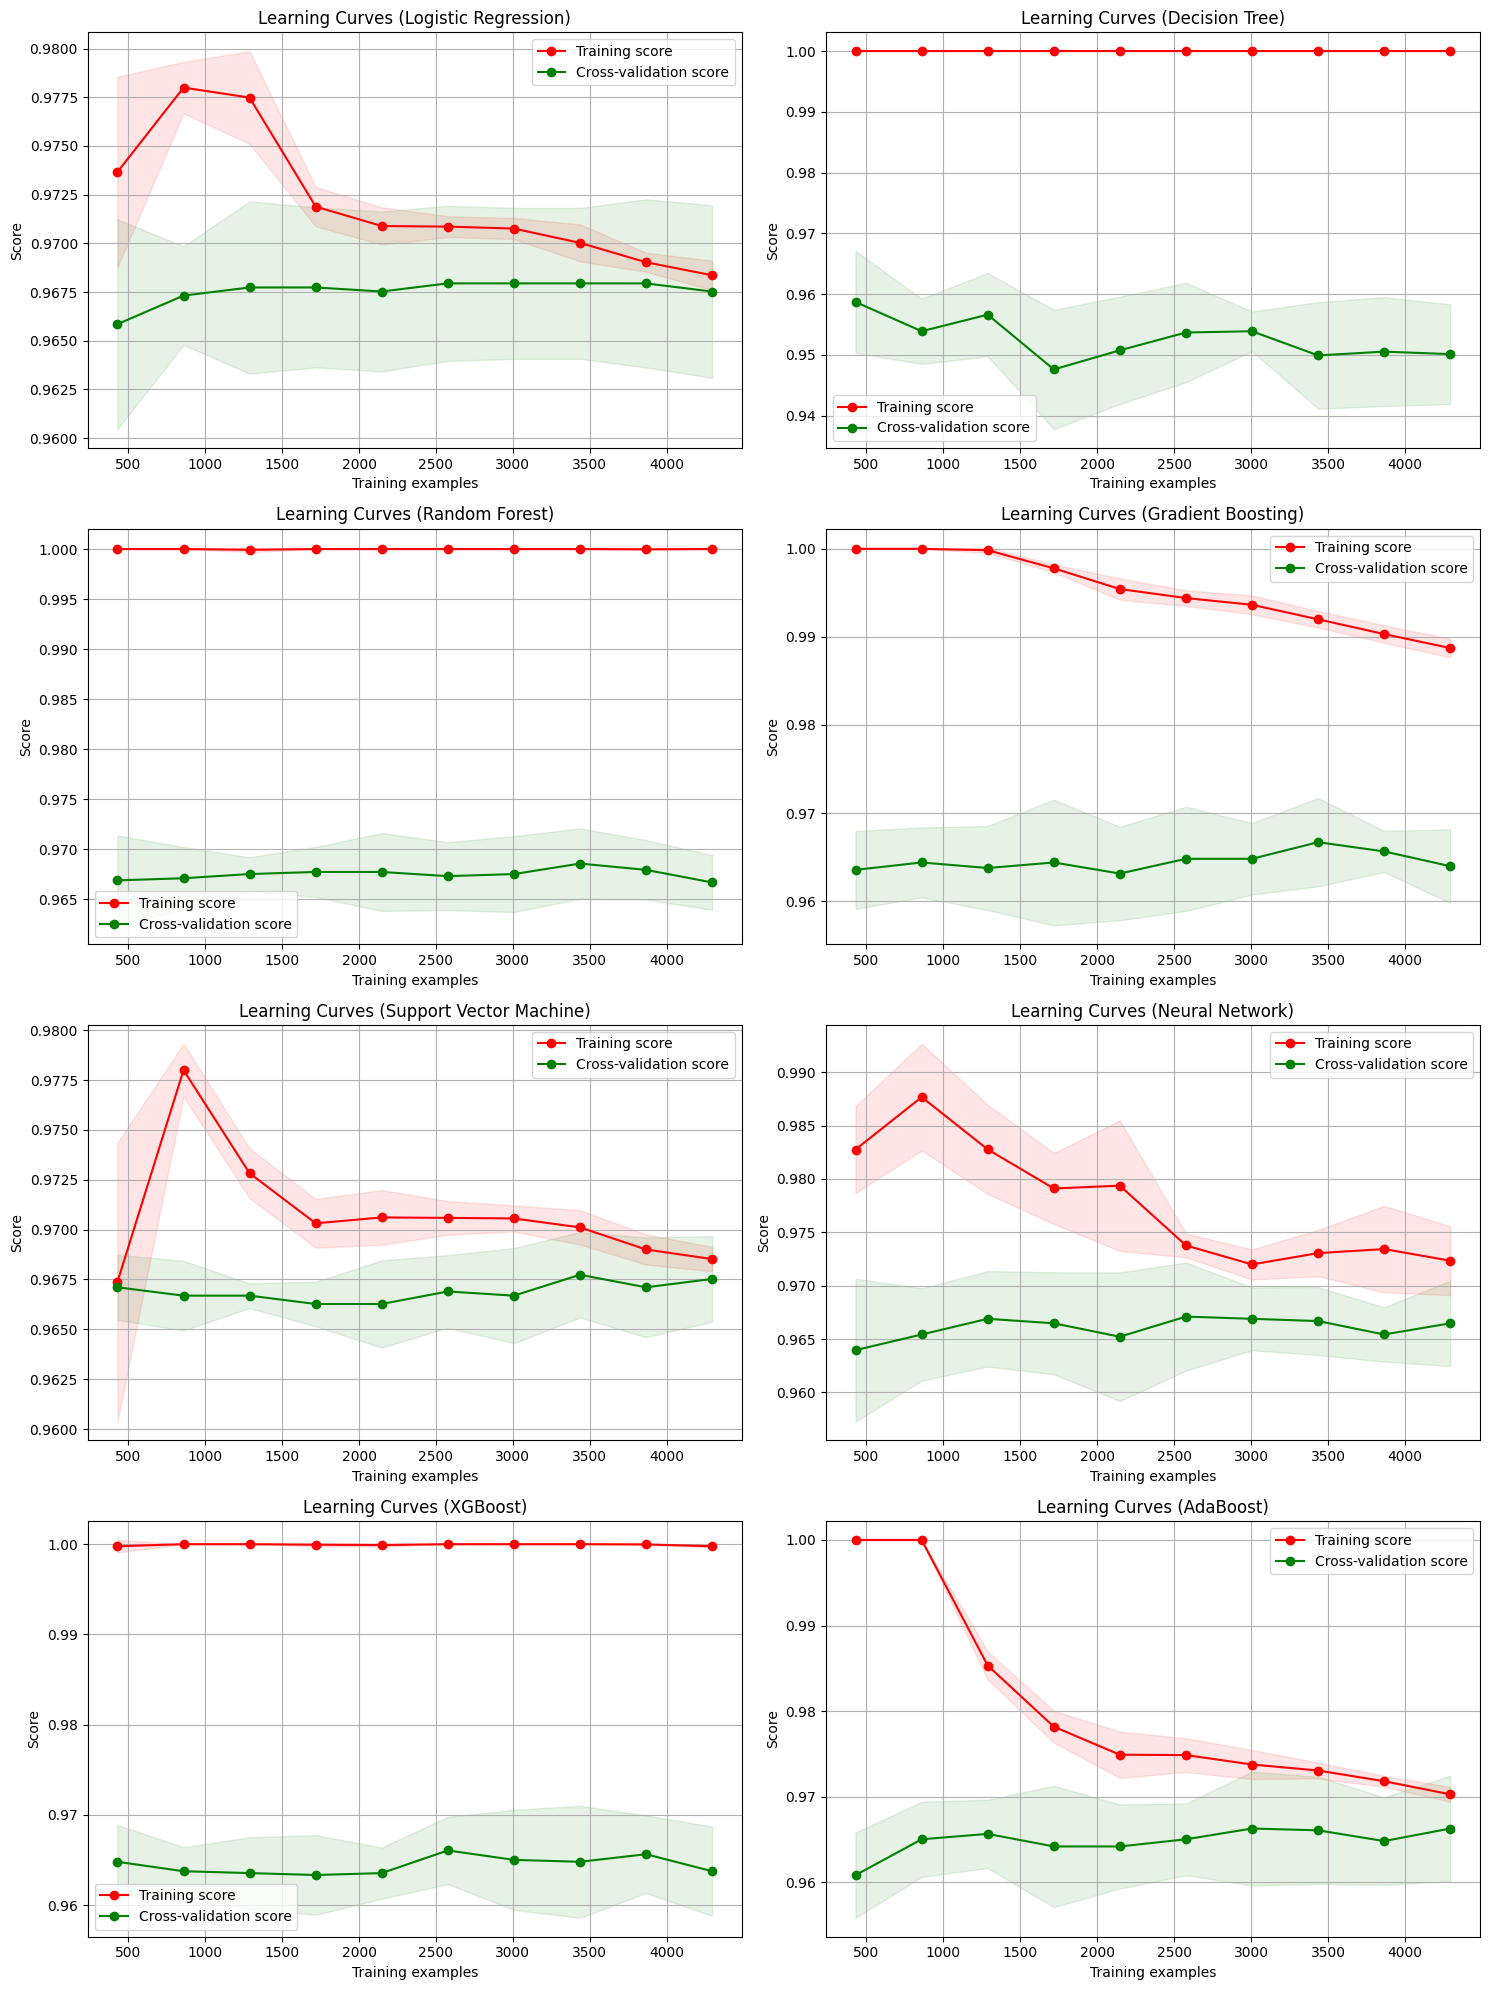

In [173]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(ax, estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax.grid()

    ax.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    ax.legend(loc="best")

# Calculate the number of rows needed for subplots
n_models = len(models)
n_cols = 2
n_rows = n_models // n_cols + (n_models % n_cols > 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

# Flatten the axes array and remove extra subplots
axes = axes.flatten()[:n_models]

# Loop over your models
for ax, (name, model) in zip(axes, models.items()):
    title = f"Learning Curves ({name})"
    cv = 10
    plot_learning_curve(ax, model, title, X_train, y_train, cv=cv, n_jobs=4)

# Remove empty subplots
for ax in axes[n_models:]:
    ax.remove()

plt.tight_layout()
plt.show()

Looks like SVM's are the way to go.

In [174]:
## Using the SVM model on the data and hyper-parameter tuning

from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 0.01, 1],
    'gamma': [1, 0.1, 'scale', 'auto'],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit=True, verbose=2, cv=5, scoring='f1')
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

# Using the best parameters to predict the test data
grid_predictions = grid.predict(X_test)

print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))




Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   8.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   6.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   8.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   8.9s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   6.5s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.6s
[CV] END .....................C=0.1, gamma=1, k